需要import的lib都放在這~

In [1]:
# import library
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import matplotlib as plt
%matplotlib inline

Helper of data_mining from TA

In [2]:
"""Helper of data_mining from TA
Helper functions for data mining lab session 2018 Fall Semester
Author: Elvis Saravia
Email: ellfae@gmail.com
"""

def format_rows(docs):
    """ format the text field and strip special characters """
    D = []
    for d in docs.data:
        temp_d = " ".join(d.split("\n")).strip('\n\t')
        D.append([temp_d])
    return D

def format_labels(target, docs):
    """ format the labels """
    return docs.target_names[target]

def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amount of missing records is: ", counter)

def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

準備我們要使用的dataset

In [3]:
# prepare dataset
# 這個dataset 有20個種類,而我們這次練習先拿出4類來用就好
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [ ]:
# 用這個指令可以看到twenty_train有甚麼attribute
dir(twenty_train)

用下面的cell來檢查資料是否已經下載好了

In [4]:
twenty_train.data[0]

'From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n'

接著我們可以列出我們使用到了哪些種類

In [ ]:
twenty_train.target_names

接著列出目前我們總共有幾筆資料

In [ ]:
len(twenty_train.data)

接著是一個簡單的處裡我們資料的方法

In [ ]:
# print("\n".join(twenty_train.data[0].split("\n")))
print(twenty_train.data[0].split("\n"))

列出當前資料的種類

In [14]:
print(twenty_train.target_names[twenty_train.target[0]])

comp.graphics


取出某項資料他的target_id

In [ ]:
print(twenty_train.target[0])

接著是一個常見的資料轉換法

In [23]:
import pandas as pd


# construct dataframe from a list
# 我們只有把資料當中的list提取出來之後做資料轉換
X = pd.DataFrame.from_records(format_rows(twenty_train), columns= ['text'])


檢查轉換後的資料長度

In [ ]:
len(X)

從轉換後的變數中把資料提取出來

In [ ]:
X[0:1]

把原始資料當中的其他column也加入到這個轉換當中

In [30]:
X['category'] = twenty_train.target

In [ ]:
X[0:1]

In [32]:
X['category_name'] = X.category.apply(lambda t: format_labels(t, twenty_train))
## 這行code是我拿來確定t是甚麼用的
## lambda t: format(t,twenty_train)的意思是 t是 input, format_labels(t,twenty_train))是output
## 而加上了apply之後，就是把X.category當作 function 的 input
## 用下面的code 可以確認t是甚麼
# X.category.apply(lambda t: (print(t),format_labels(t, twenty_train)))
# print("#"*50)
# X.category


In [ ]:
X[0:1]

提取特定的column、row

In [ ]:
X[:10][["text","category_name"]]


In [ ]:
X[:10][["text"]]

提取特定的category

In [ ]:
X[X['category_name'] == "sci.med"]

檢查表格當中有沒有不含有資料的

In [ ]:
# false 代表不是null，代表有資料
X.isnull()

In [ ]:
# 把X.isnull的結果作為x輸入到 check_missing_value裡面
X.isnull().apply(lambda x: check_missing_values(x))

接著是如何自己新增資料到X

In [ ]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])
dummy_series.to_frame()

result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
# check if the records was commited into result
len(result_with_series)



In [ ]:
#我們新增的資料沒有category_name，所以理論上這次檢查, null應該要多一個
X.isnull().apply(lambda x: check_missing_values(x))
# 刪除有null val的資料
X.dropna(inplace=True)

接著是檢查有沒有重複的資料

In [ ]:
X.duplicated()

In [65]:
# 把X.duplicated()的回傳值都加起來
# 若沒有重複會回傳false(0) 
# 所以如果sum不是0 代表有資料重複
sum(X.duplicated())

0

手動加個duplicated data進去試試看

In [70]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)
len(X)


2259

In [71]:
sum(X.duplicated())

1

接著就是如何處理重複的部分(刪掉)

In [ ]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe
sum(X.duplicated('text'))
len(X)


接著是資料的採樣

In [81]:
X_sample = X.sample(n=1000) #random state
len(X_sample)

1000

In [ ]:
X_sample[0:4]

接著終於到資料分析的部分了

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
categories

In [82]:
# 統計每個種類有多少數量
print(X.category_name.value_counts())

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


In [ ]:
# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

# 可以看我們plt能畫出哪幾種圖
# print(plt.style.available)

<AxesSubplot: title={'center': 'Category distribution'}>

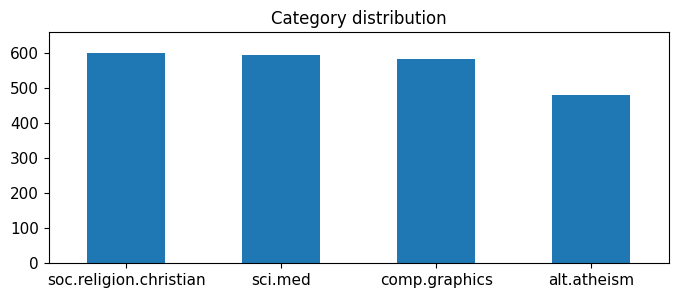

In [84]:
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, max(X.category_name.value_counts()) * 1.1],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

切著示範如何將text當中的字切成一個一個unit

In [86]:
X['unigrams'] = X['text'].apply(lambda x: tokenize_text(x))

In [92]:
X[:1][['unigrams']]
# X.unigrams[:1]

,unigrams
0,"[From, :, sd345, @, city.ac.uk, (, Michael, Co..."


我們可以統計unit出現的次數，並做成表格

In [100]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

print(X_counts.shape)
# output should be(2257,35788)
# 表示總共有2257筆資料
# 而在這2257筆資料當中，總共有35788個token

(2257, 35788)


In [ ]:
# 把表格的前5筆資料當中的前100個token 拉出來做成array
X_counts[0:5, 0:100].toarray()

In [102]:
# 我們可以透過這個來取出特定index的token
count_vect.get_feature_names_out()[0:35789]

array(['00', '000', '0000', ..., 'zzz', 'ªl', 'íålittin'], dtype=object)

接著我們可以將這個轉成圖表，讓我們確認

In [113]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

# 前20個資料的前20個token
plot_z = X_counts[0:20, 0:20].toarray()
plot_z

畫出heatmap

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,cmap="PuRd",vmin=0, vmax=1, annot=True)

接著我們統計對於所有document(2257筆) 單一token的出現頻率

In [ ]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# 代表第一個token出現的頻率
term_frequencies[0] 

In [ ]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

因為字詞頻率出現的差異太大，可以用log來表示，比較好看一點

In [ ]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

In [ ]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);